In [15]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import numpy as np

In [2]:
group1 = [[0.067, 0.21], [0.092, 0.21], 
  [0.294, 0.445], [0.227, 0.521], [0.185, 0.597], 
  [0.185, 0.689], [0.235, 0.748], [0.319, 0.773], 
  [0.387, 0.739], [0.437, 0.672], [0.496, 0.739],
  [0.571, 0.773], [0.639, 0.765], [0.765, 0.924],
  [0.807, 0.933], [0.849, 0.941]]
group2 = [[0.118, 0.143], [0.118, 0.176], 
  [0.345, 0.378], [0.395, 0.319], [0.437, 0.261],
  [0.496, 0.328], [0.546, 0.395], [0.605, 0.462],
  [0.655, 0.529], [0.697, 0.597], [0.706, 0.664],
  [0.681, 0.723], [0.849, 0.798], [0.857, 0.849],
  [0.866, 0.899]]

In [11]:
np.array(group1)[:,0]

array([0.067, 0.092, 0.294, 0.227, 0.185, 0.185, 0.235, 0.319, 0.387,
       0.437, 0.496, 0.571, 0.639, 0.765, 0.807, 0.849])

In [12]:
import matplotlib.pyplot as plt

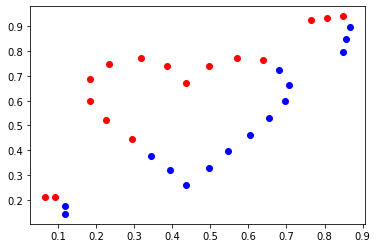

In [14]:
plt.scatter(np.array(group1)[:,0], np.array(group1)[:,1], c="red")
plt.scatter(np.array(group2)[:,0], np.array(group2)[:,1], c="blue")

plt.show()

# the line is like y = x + 0.05 but lets build a linear separator; lets say red ones are 1 and blue ones are 0 class, I will use pandas just to show you that I know Pandas

I do not separate train and test sets for instance

In [20]:
y_group1 = np.zeros(np.array(group1).shape[0])
y_group2 = np.ones(np.array(group2).shape[0])

In [29]:
X = np.vstack((np.asarray(group1), np.asarray(group2)))

In [30]:
X

array([[0.067, 0.21 ],
       [0.092, 0.21 ],
       [0.294, 0.445],
       [0.227, 0.521],
       [0.185, 0.597],
       [0.185, 0.689],
       [0.235, 0.748],
       [0.319, 0.773],
       [0.387, 0.739],
       [0.437, 0.672],
       [0.496, 0.739],
       [0.571, 0.773],
       [0.639, 0.765],
       [0.765, 0.924],
       [0.807, 0.933],
       [0.849, 0.941],
       [0.118, 0.143],
       [0.118, 0.176],
       [0.345, 0.378],
       [0.395, 0.319],
       [0.437, 0.261],
       [0.496, 0.328],
       [0.546, 0.395],
       [0.605, 0.462],
       [0.655, 0.529],
       [0.697, 0.597],
       [0.706, 0.664],
       [0.681, 0.723],
       [0.849, 0.798],
       [0.857, 0.849],
       [0.866, 0.899]])

In [32]:
y = np.hstack((y_group1, y_group2))

In [28]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
import pandas as pd

In [36]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=10)
model.fit(X, y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

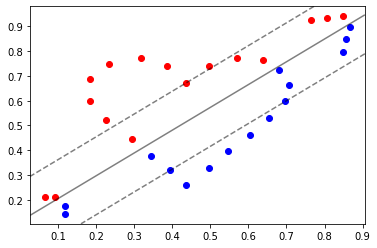

In [42]:
plt.scatter(np.array(group1)[:,0], np.array(group1)[:,1], c="red")
plt.scatter(np.array(group2)[:,0], np.array(group2)[:,1], c="blue")

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, linewidth=1, facecolors='none')
plt.show()

In [44]:
model.coef_

array([[ 5.85768144, -6.36002679]])